## Nama     : Muhamad Ibnu Khaidar Hafiz
### NPM     : 50421867
### Kelas   : 4IA15
### Praktikum Robotika cerdas

## **1) Importing Python Packages for GAN**


In [1]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Dropout

# Import LeakyReLU directly from keras.layers
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
!mkdir generated_images

2024-10-26 15:13:03.395495: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-26 15:13:03.412796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 15:13:03.433633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 15:13:03.439998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 15:13:03.454952: I tensorflow/core/platform/cpu_feature_guar

## **2) Parameters for Neural Networks & Data**

In [2]:
img_width = 32
img_height = 32
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

2024-10-26 15:13:07.432561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20750 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


## **3) Building Generator**





In [3]:
def build_generator():
    model = Sequential()

    # Create first layer, to receive the input
    model.add(Dense(256 * 4 * 4, input_dim = latent_dim))
    # 256 * 8 * 8; for upscaling the layers,
    # initial shape to construct into final shape

    # Create default activation function
    model.add(LeakyReLU(alpha = 0.2))

    # Create reshape layer
    model.add(Reshape((4, 4,256)))
    # 8,8,256 ; reffers to first layer

    # Adding more layers for neurons and better result
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    # (4,4) >> filter size
    # strides = (2,2) >> Convolutional layers, that how NN understand images

    # Create Final output layer and forming image shape
    # the shape (3, (3,3)) reffers to image shape :
    #    >>>  img_shape = (img_width, img_height, channels)
    model.add(Conv2D(3, (3,3), activation= 'tanh', padding = 'same'))

    #
    model.summary()
    return model

generator = build_generator()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

## **4) Building Discriminator**

In [4]:
def build_discriminator():
    model = Sequential()

    # Create input layer and filter and stride layer. That makes NN understand image
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = img_shape))

    # Adding activation function
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(256, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Flatten())

    model.add(Dropout(0.4))

    # Create output layer
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       262,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,545 (2.98 MB)

 Trainable params: 780,545 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

## **5) Connecting Neural Networks to build GAN**

In [5]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [6]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       780,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,660 (8.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 780,545 (2.98 MB)

## **6) Outputting Images**


In [7]:
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001
    # print("%.8f" % save_name)

    # Rescale images 0 - 1
    # gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = (gen_imgs + 1) / 2.0
    # gen_imgs = gen_imgs * 255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

## **7) Training GAN**

In [8]:
def train(epochs, batch_size = 64, save_interval = 200):
  (X_train, _), (_, _) = cifar10.load_data()

  # Rescaling the data
  X_train = X_train / 127.5 -1.

  bat_per_epo = int(X_train.shape[0] / batch_size)

  # Create Y label for NN
  valid = np.ones((batch_size,1))
  fakes = np.zeros((batch_size, 1))

  for epoch in range (epochs) :
    for j in range(bat_per_epo) :
      #Get Random Batch
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      # Generate Fakes Images
      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      gen_imgs = generator.predict(noise)

      # Train Discriminator
      d_loss_real = discriminator.train_on_batch(imgs, valid)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      noise = np.random.normal(0, 1, (batch_size, latent_dim))

      # Inverse Y label
      g_loss = GAN.train_on_batch(noise, valid)

      print("******* %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100* d_loss[1], g_loss[0]))
    save_imgs(epoch)

train(100, batch_size = 64, save_interval = 20)

I0000 00:00:1729955590.350439   64947 service.cc:146] XLA service 0x7fd8d4006160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729955590.350470   64947 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-10-26 15:13:10.361985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-26 15:13:10.399004: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


I0000 00:00:1729955591.087149   64947 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


******* 0 [D loss: 0.717884, acc: 27.34%] [G loss: 0.709294]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.711143, acc: 39.19%] [G loss: 0.708559]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.710610, acc: 32.32%] [G loss: 0.709079]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.710858, acc: 25.11%] [G loss: 0.709760]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.710918, acc: 20.29%] [G loss: 0.710092]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.710814, acc: 16.88%] [G loss: 0.710181]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.710756, acc: 14.84%] [G loss: 0.710263]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
******* 0 [D loss: 0.711176, acc: 13.22%] [G loss: 0.710789]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.711534, acc: 11.71%] [G loss: 0.711230]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 [D loss: 0.711983, acc: 10.74%] [G loss: 0.711770]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
******* 0 

KeyboardInterrupt: 

In [9]:
noise = np.random.normal(0, 1, (1,latent_dim))
gen_imgs = generator.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


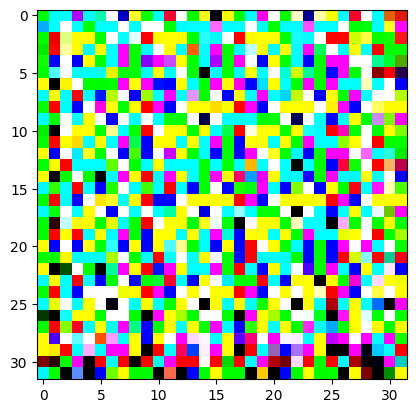

In [10]:
gen_imgs = (gen_imgs + 1) / 2.0
plt.imshow(gen_imgs[0])

### **8) Making GIF**

In [11]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

  if filenames:  # Check if filenames is not empty
    image = imageio.imread(filenames[-1])
    writer.append_data(image)